# Fitting a Bond Yield Curve

Fitting a bond yield curve using the range of parametric functions provided

In [1]:
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
from financepy.utils import *
from financepy.products.bonds import *


####################################################################
#  FINANCEPY BETA Version 0.350 - This build: 30 Apr 2024 at 21:20 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Load up some Bond Data

In [3]:
bond_dataframe = pd.read_csv('./data/giltbondprices.txt', sep='\t')

In [4]:
# CALCULATE MID MARKET PRICES
bond_dataframe['mid'] = 0.5*(bond_dataframe['bid'] + bond_dataframe['ask'])

In [5]:
# SPECIFY UK BOND CONVENTIONS
frequencyType = FrequencyTypes.SEMI_ANNUAL
dc_type = DayCountTypes.ACT_ACT_ICMA
settlement = Date(19, 9, 2012)

In [6]:
bonds = []
ylds = []

# LOAD BONDS AND CREATE A VECTOR OF FINBOND AND THEIR CORRESPONDING YIELDS

for index, bondData in bond_dataframe.iterrows():

    date_string = bondData['maturity']
    mat_dt_time = dt.datetime.strptime(date_string, '%d-%b-%y')
    maturity_dt = from_datetime(mat_dt_time)
    coupon = bondData['coupon']/100.0
    clean_price = bondData['mid']
    issue_dt = Date(maturity_dt.d, maturity_dt.m, 2000)
    bond = Bond(issue_dt, maturity_dt, coupon, frequencyType, dc_type)
    yld = bond.yield_to_maturity(settlement, clean_price)
    bonds.append(bond)
    ylds.append(yld)

## Fitting the Yield Curves

### Cubic Polynomial

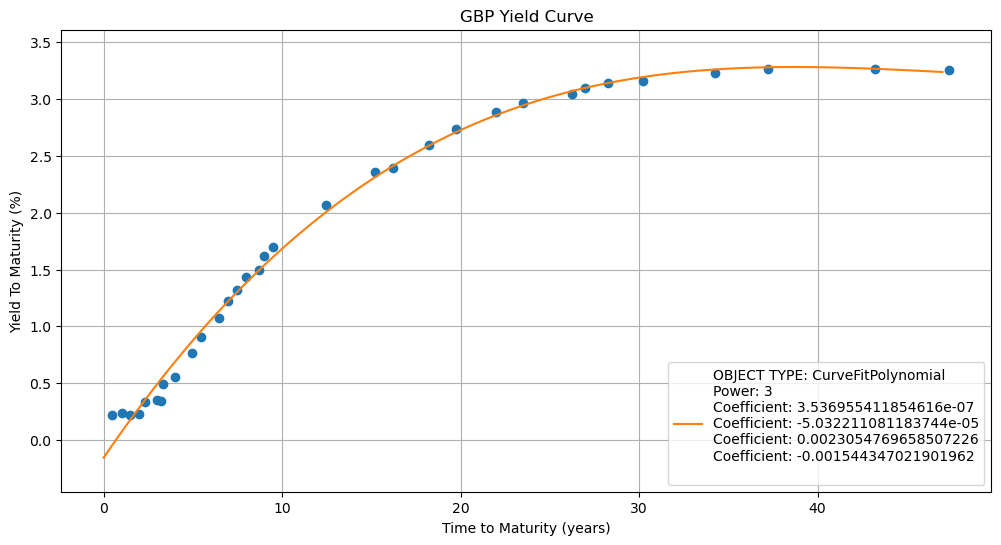

In [7]:
# FIT THE BOND YIELDS TO A CUBIC POLYNOMIAL
curveFitMethod = CurveFitPolynomial()
fitted_curve1 = BondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fitted_curve1.plot("GBP Yield Curve")

See the cubic coefficients

In [8]:
print(fitted_curve1.curve_fit)

OBJECT TYPE: CurveFitPolynomial
Power: 3
Coefficient: 3.536955411854616e-07
Coefficient: -5.032211081183744e-05
Coefficient: 0.0023054769658507226
Coefficient: -0.001544347021901962



### Quintic Polynomial

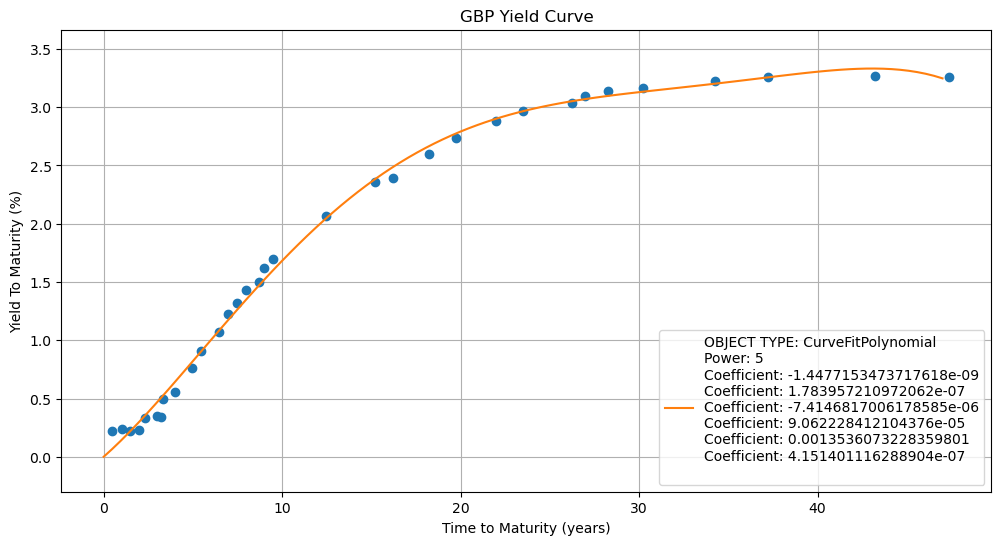

In [9]:
# FIT THE BOND YIELDS TO A QUINTIC POLYNOMIAL
curveFitMethod = CurveFitPolynomial(5)
fitted_curve2 = BondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fitted_curve2.plot("GBP Yield Curve")

See the quintic coefficients

In [10]:
print(fitted_curve2.curve_fit)

OBJECT TYPE: CurveFitPolynomial
Power: 5
Coefficient: -1.4477153473717618e-09
Coefficient: 1.783957210972062e-07
Coefficient: -7.4146817006178585e-06
Coefficient: 9.062228412104376e-05
Coefficient: 0.0013536073228359801
Coefficient: 4.151401116288904e-07



### Nelson-Siegel Curve

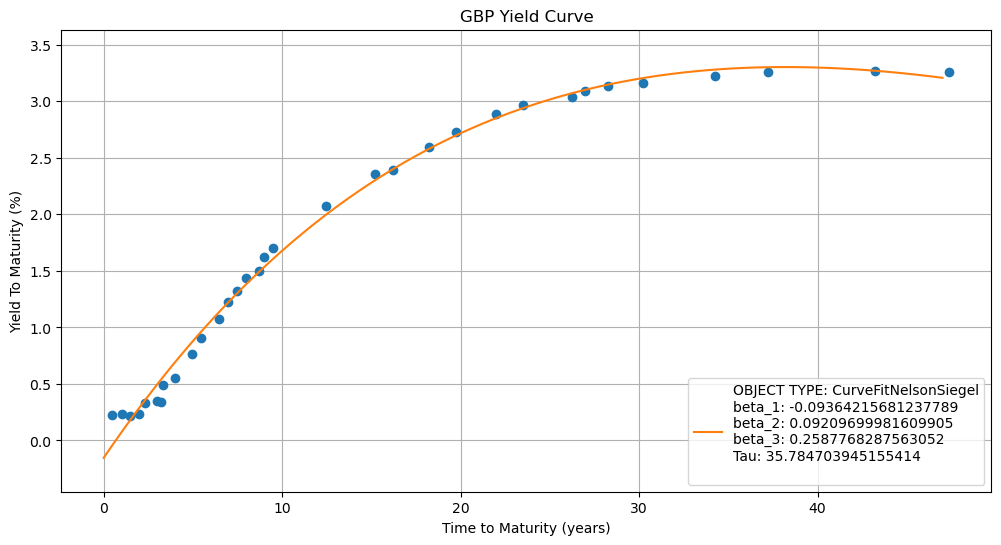

In [11]:
# FIT THE BONDS TO A NELSON-SIEGEL CURVE
curveFitMethod = CurveFitNelsonSiegel()
fitted_curve3 = BondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fitted_curve3.plot("GBP Yield Curve")

In [12]:
print(fitted_curve3.curve_fit)

OBJECT TYPE: CurveFitNelsonSiegel
beta_1: -0.09364215681237789
beta_2: 0.09209699981609905
beta_3: 0.2587768287563052
Tau: 35.784703945155414



### Nelson-Siegel Svensson Curve

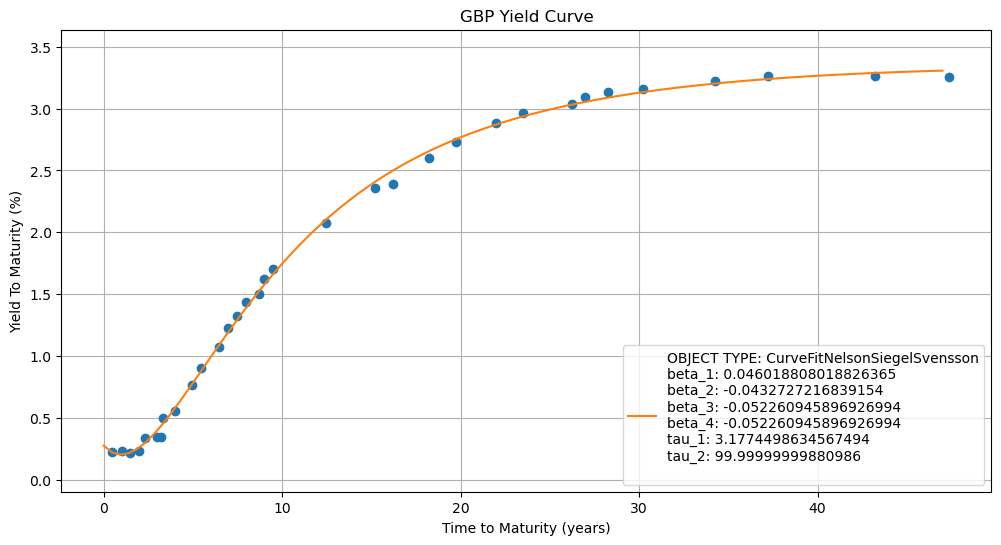

In [13]:
# FIT THE BONDS TO A NELSON-SIEGEL-SVENSSON CURVE
curveFitMethod = CurveFitNelsonSiegelSvensson()
fitted_curve4 = BondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fitted_curve4.plot("GBP Yield Curve")

In [14]:
print(fitted_curve4.curve_fit)

OBJECT TYPE: CurveFitNelsonSiegelSvensson
beta_1: 0.046018808018826365
beta_2: -0.0432727216839154
beta_3: -0.052260945896926994
beta_4: -0.052260945896926994
tau_1: 3.1774498634567494
tau_2: 99.99999999880986



### B-Spline Curve

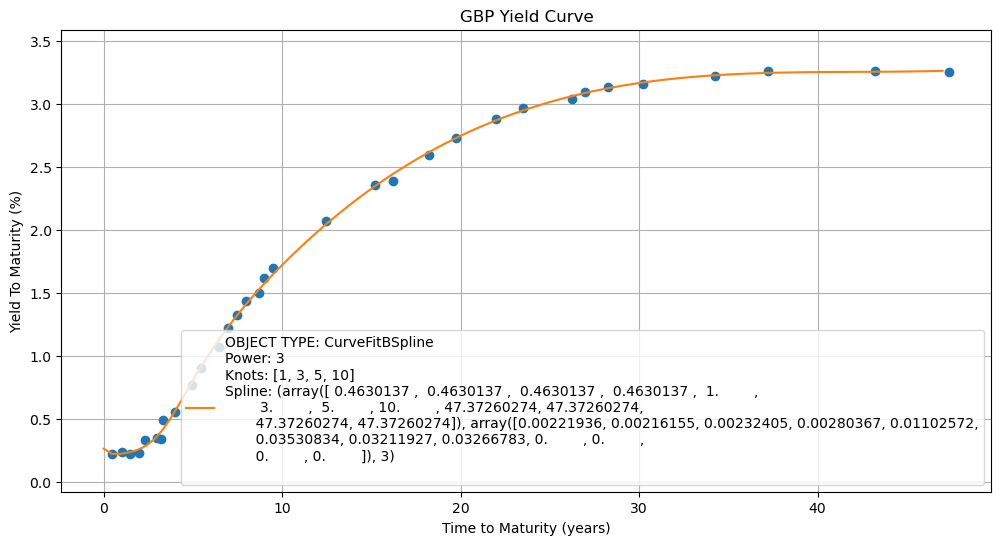

In [15]:
# FIT THE BONDS TO A B-SPLINE CURVE
curveFitMethod = CurveFitBSpline()
fitted_curve5 = BondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fitted_curve5.plot("GBP Yield Curve")

In [16]:
print(fitted_curve5.curve_fit)

OBJECT TYPE: CurveFitBSpline
Power: 3
Knots: [1, 3, 5, 10]
Spline: (array([ 0.4630137 ,  0.4630137 ,  0.4630137 ,  0.4630137 ,  1.        ,
        3.        ,  5.        , 10.        , 47.37260274, 47.37260274,
       47.37260274, 47.37260274]), array([0.00221936, 0.00216155, 0.00232405, 0.00280367, 0.01102572,
       0.03530834, 0.03211927, 0.03266783, 0.        , 0.        ,
       0.        , 0.        ]), 3)



## Accessing the Curve

You can access a yield from a date as follows

In [17]:
# EXTRACT A YIELD FROM A FITTED YIELD CURVE
maturity_dt = Date(19, 9, 2030)
interp_yield = fitted_curve5.interp_yield(maturity_dt)
print(maturity_dt, interp_yield*100)

19-SEP-2030 2.601858181495865


## Vectorisations

You can also access the curve using a time and this can be vectorised.

In [18]:
times = np.linspace(0,10,100)

In [19]:
interp_yields = fitted_curve5.interp_yield(times)

In [20]:
interp_yields*100

array([0.26306369, 0.24887934, 0.23790448, 0.2297898 , 0.22418597,
       0.22074366, 0.21911356, 0.21894635, 0.2198927 , 0.22160328,
       0.22372886, 0.22601011, 0.228455  , 0.23112088, 0.23406513,
       0.2373451 , 0.24101817, 0.2451417 , 0.24977306, 0.25496961,
       0.26078871, 0.26728775, 0.27452407, 0.28255505, 0.29143805,
       0.30123044, 0.31198958, 0.32377284, 0.33663758, 0.35064118,
       0.36584038, 0.3822446 , 0.39978298, 0.4183769 , 0.43794773,
       0.45841686, 0.47970566, 0.50173551, 0.52442779, 0.54770387,
       0.57148513, 0.59569294, 0.62024869, 0.64507375, 0.6700895 ,
       0.69521731, 0.72037857, 0.74549464, 0.77048691, 0.79527676,
       0.81978729, 0.84398152, 0.86786238, 0.89143451, 0.91470257,
       0.93767122, 0.96034511, 0.98272889, 1.00482723, 1.02664478,
       1.04818618, 1.06945611, 1.0904592 , 1.11120013, 1.13168353,
       1.15191407, 1.1718964 , 1.19163518, 1.21113507, 1.23040071,
       1.24943676, 1.26824788, 1.28683872, 1.30521393, 1.32337

Copyright (c) 2020 Dominic O'Kane